In [1]:
path = '~/.kaggle/competitions/titanic/'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings

warnings.filterwarnings('ignore')


/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
train_data = pd.read_csv(path + 'train.csv')


In [4]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train_data.isnull().sum() # 查看缺失值。

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

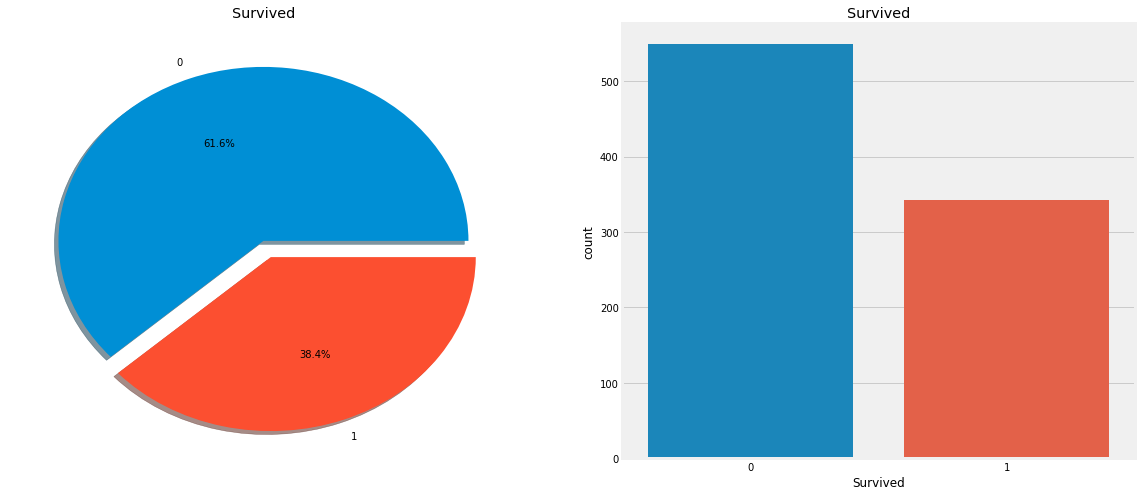

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train_data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel("")
sns.countplot('Survived', data=train_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()


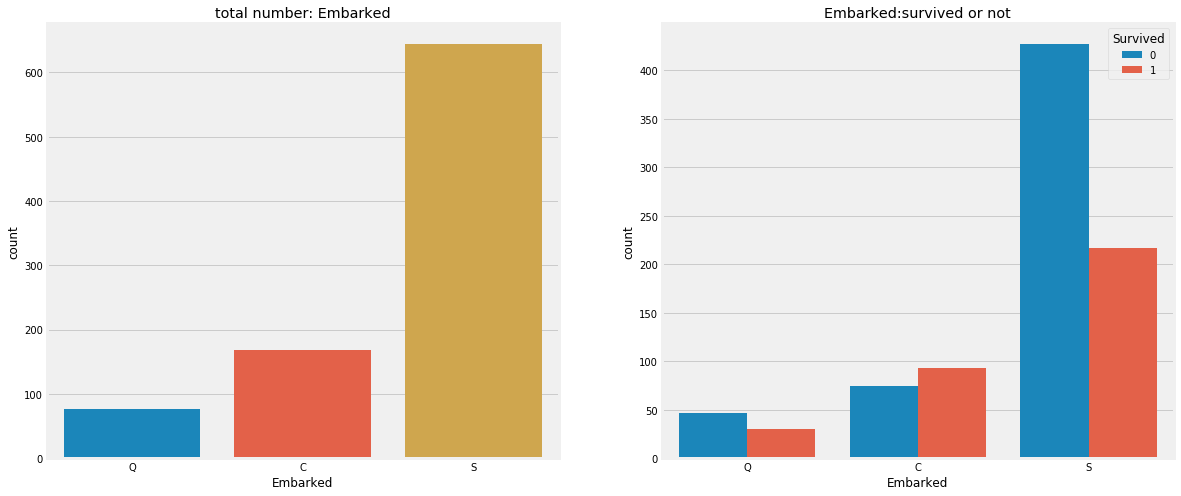

In [18]:
# 标称属性
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.countplot('Embarked', data=train_data, order=['Q','C','S'], ax=ax[0])
ax[0].set_title('total number: Embarked')
sns.countplot('Embarked', hue='Survived', order=['Q', 'C', 'S'], data=train_data, ax=ax[1])
ax[1].set_title('Embarked:survived or not')
plt.show()

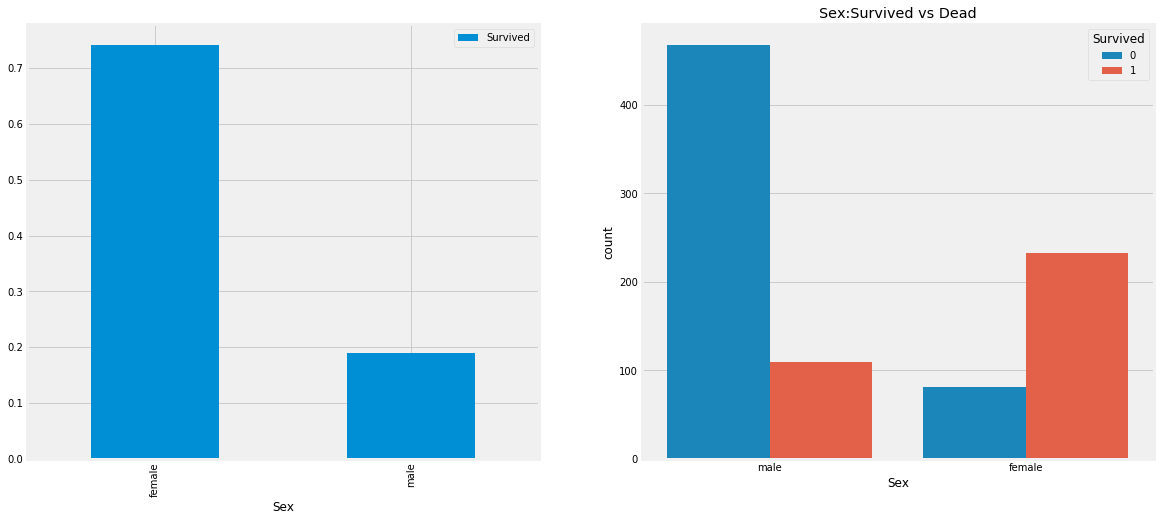

In [19]:
# 布尔属性
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
sns.countplot('Sex', hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [21]:
# 序数属性
pd.crosstab(train_data.Pclass,train_data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


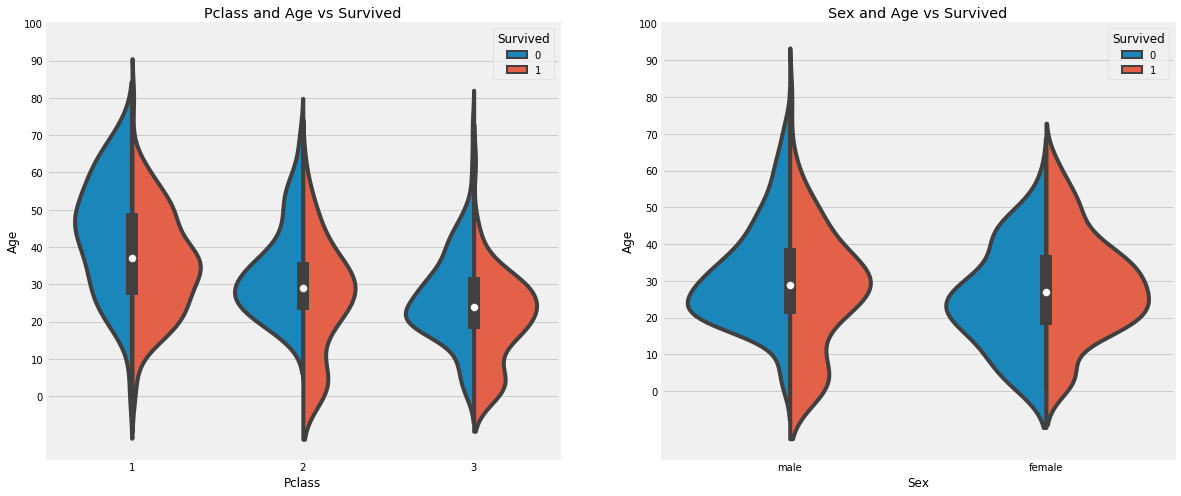

In [22]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue='Survived', data=train_data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=train_data, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [23]:
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch']

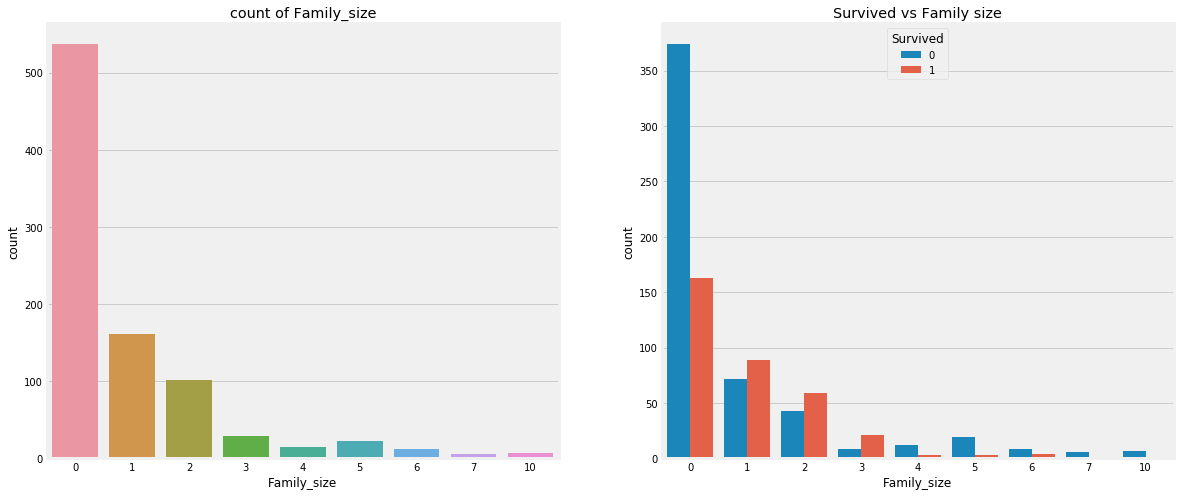

In [24]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.countplot("Family_size", data=train_data, ax=ax[0])
ax[0].set_title('count of Family_size')
sns.countplot("Family_size", hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title("Survived vs Family size")
plt.show()

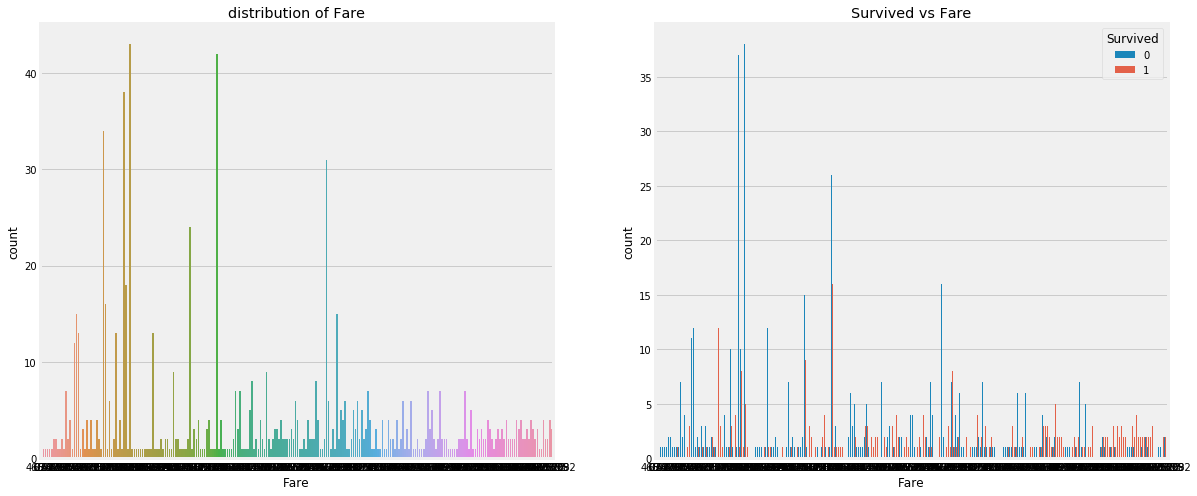

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.countplot('Fare', data=train_data, ax=ax[0])
ax[0].set_title('distribution of Fare')
sns.countplot('Fare', hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title('Survived vs Fare')
plt.show()

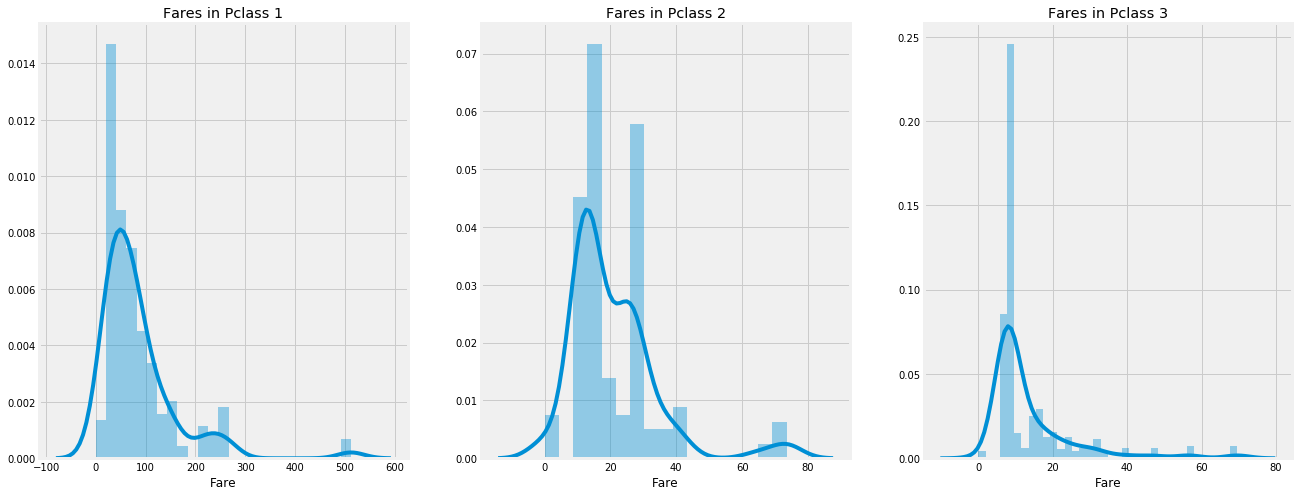

In [27]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(train_data[train_data['Pclass'] == 1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train_data[train_data['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train_data[train_data['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()


In [28]:
train_data.Name


0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [32]:
train_data['Initial'] = 0
for i in train_data:
    train_data['Initial'] = train_data.Name.str.extract('([A-Za-z]+)\.')  #lets extract the Salutations


In [33]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [35]:
pd.crosstab(train_data.Initial,train_data.Sex).T.style.background_gradient(cmap='summer_r') 
# Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [36]:
train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [37]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [38]:
train_data[['Initial','Age']].groupby(['Initial']).mean()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [39]:
train_data['Age'].isnull().sum()

177

In [40]:
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Other'),'Age']=46

In [42]:
train_data['Age'].isnull().sum() # 无缺失行。

0

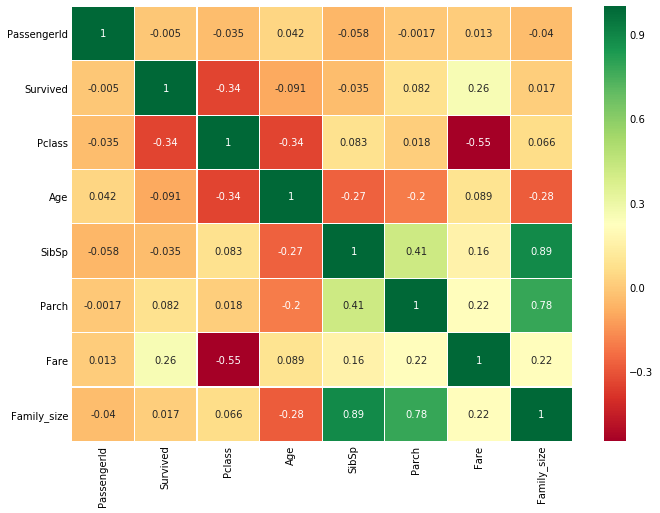

In [43]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
# data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [44]:
train_data['Age_band']=0
train_data.loc[train_data['Age']<=16,'Age_band']=0
train_data.loc[(train_data['Age']>16)&(train_data['Age']<=32),'Age_band']=1
train_data.loc[(train_data['Age']>32)&(train_data['Age']<=48),'Age_band']=2
train_data.loc[(train_data['Age']>48)&(train_data['Age']<=64),'Age_band']=3
train_data.loc[train_data['Age']>64,'Age_band']=4

In [45]:
train_data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


In [47]:
train_data['Alone']=0
train_data.loc[train_data.Family_size==0,'Alone']=1

In [48]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Initial,Age_band,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,2,1


In [49]:
train_data['Fare_Range']=pd.qcut(train_data['Fare'],4)

In [50]:
train_data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [51]:
train_data['Fare_cat']=0
train_data.loc[train_data['Fare']<=7.91,'Fare_cat']=0
train_data.loc[(train_data['Fare']>7.91)&(train_data['Fare']<=14.454),'Fare_cat']=1
train_data.loc[(train_data['Fare']>14.454)&(train_data['Fare']<=31),'Fare_cat']=2
train_data.loc[(train_data['Fare']>31)&(train_data['Fare']<=513),'Fare_cat']=3

In [52]:
train_data['Sex'].replace(['male','female'],[0,1],inplace=True)
train_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train_data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [53]:
train_data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','Initial','SibSp','Parch','PassengerId'],axis=1,inplace=True)

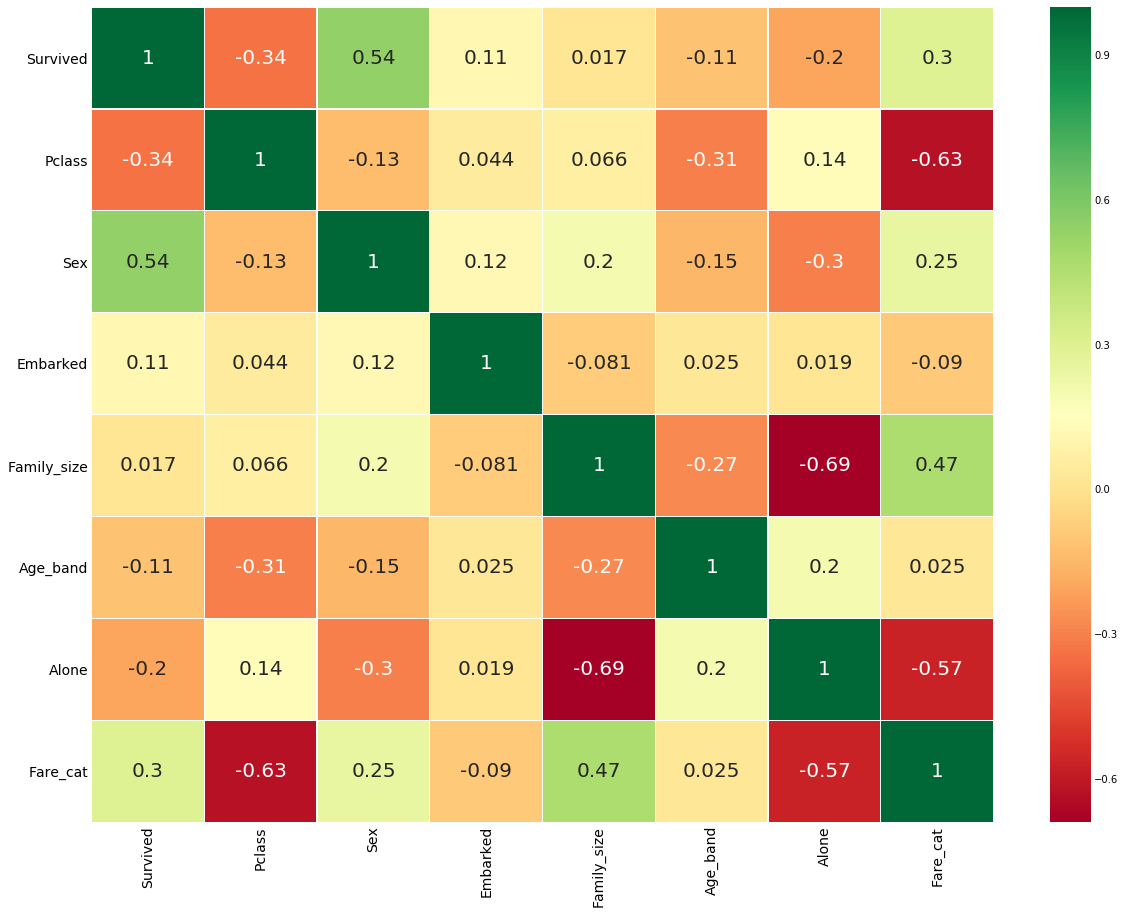

In [54]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [55]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression  #logistic regression
from sklearn import svm  #support vector Machine
from sklearn.ensemble import RandomForestClassifier  #Random Forest
from sklearn.neighbors import KNeighborsClassifier  #KNN
from sklearn.naive_bayes import GaussianNB  #Naive bayes
from sklearn.tree import DecisionTreeClassifier  #Decision Tree
from sklearn.model_selection import train_test_split  #training and testing data split
from sklearn import metrics  #accuracy measure
from sklearn.metrics import confusion_matrix  #for confusion matrix


In [67]:
train, test = train_test_split(train_data, test_size=0.3, random_state=0, stratify=train_data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = train_data[train_data.columns[1:]]
Y = train_data['Survived']


In [68]:
train.isnull().sum()


Survived       0
Pclass         0
Sex            0
Embarked       2
Family_size    0
Age_band       0
Alone          0
Fare_cat       0
dtype: int64

In [69]:
train_X.isnull().sum()


Pclass         0
Sex            0
Embarked       2
Family_size    0
Age_band       0
Alone          0
Fare_cat       0
dtype: int64

In [70]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').